## Cleaning
Drop column with extera catigorical data or data that just give bias to prefered players: usage, college year, ht, num, pfr, year, rec rank, pick, pik drafted, gbpm, offensive gdbm, defensive gdbm, type, Recruit Rank

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('trainingData/CollegeBasketballPlayers2009-2021.csv', low_memory=False)
df = df.rename(columns = {'Unnamed: 64' : 'role_position'})
df = df.drop('Unnamed: 65', axis=1) # Has no meaning in the dataset
df = df.drop('player_name', axis=1) # player name should not determine player's performance score
df = df.drop('ht', axis=1) # Temporarily excluding this column due to inconsistent date formats and other values
df = df.drop('num', axis=1) # It might denote a player's choice or position but with significant variation in meaning.
df = df.drop('type', axis=1) # Column has 1 unique value
df= df.drop('pid', axis=1) # catigorical, not needed 
df.shape


(61061, 60)

In [2]:
# Count and remove columns with over 60% nan values 
total = len(df)
for column in df.columns:
    count = df[column].isna().sum()
    percent= (count/ total) * 100
    if (percent>=60):
        print(f"Column '{column}':", f"Number of NaN: {count}", f"Percentage: {percent:.2f}%")
  

Column 'Rec Rank': Number of NaN: 42591 Percentage: 69.75%
Column 'pick': Number of NaN: 59626 Percentage: 97.65%


In [3]:
df = df.drop('pick', axis=1) 
df = df.drop('Rec Rank', axis=1) 

fill in missing values using knn

In [4]:
team_label_encoder = LabelEncoder()
df['team'] = team_label_encoder.fit_transform(df['team'])

conf_label_encoder = LabelEncoder()
df['conf'] = conf_label_encoder.fit_transform(df['conf'])

yr_label_encoder = LabelEncoder()
df['yr'] = yr_label_encoder.fit_transform(df['yr'])

role_position_label_encoder = LabelEncoder()
df['role_position'] = role_position_label_encoder.fit_transform(df['role_position'])

In [5]:
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df.fillna(np.nan))

In [31]:
# Convert the imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

In [ ]:
# imputed_df.to_excel("knnimputer.xlsx", index=False)

Remove redundancy

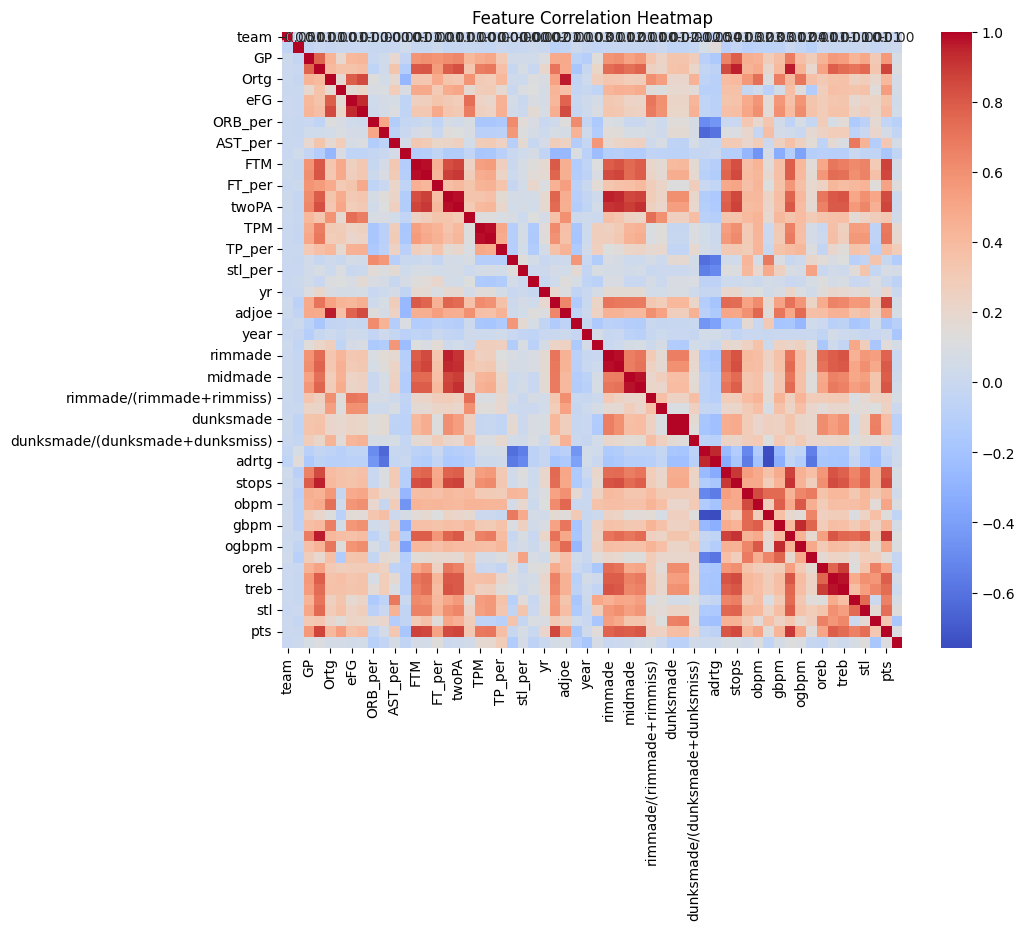

In [8]:
# Calculate the correlation matrix
correlation_matrix = imputed_df.corr()

# # Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
# find any corrilation >=.9 to determine redundant features 
threshold = 0.9  

# Iterate through the correlation matrix and print highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Added a closing parenthesis here
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

Min_per and stops: 0.95
Min_per and mp: 0.96
Ortg and adjoe: 0.97
eFG and TS_per: 0.93
FTM and FTA: 0.98
twoPM and twoPA: 0.98
twoPM and rimmade: 0.95
twoPM and rimmade+rimmiss: 0.94
twoPA and rimmade: 0.92
twoPA and rimmade+rimmiss: 0.93
twoPA and midmade+midmiss: 0.92
TPM and TPA: 0.99
rimmade and rimmade+rimmiss: 0.98
midmade and midmade+midmiss: 0.98
dunksmade and dunksmiss+dunksmade: 1.00
drtg and adrtg: 0.94
dporpag and stops: 0.90
stops and mp: 0.91
gbpm and ogbpm: 0.94
mp and pts: 0.90
dreb and treb: 0.97


In [32]:
# remove redundancy
imputed_df= imputed_df.drop('rimmade', axis=1) 
imputed_df= imputed_df.drop('rimmade+rimmiss', axis=1) 
imputed_df= imputed_df.drop('Ortg', axis=1) 
imputed_df= imputed_df.drop('Min_per', axis=1) 
imputed_df= imputed_df.drop('eFG', axis=1) 
imputed_df= imputed_df.drop('drtg', axis=1)
imputed_df= imputed_df.drop('stops', axis=1)
imputed_df= imputed_df.drop('gbpm', axis=1)
imputed_df= imputed_df.drop('dreb', axis=1)
imputed_df= imputed_df.drop('yr', axis=1)
imputed_df= imputed_df.drop('midmade+midmiss', axis=1)
imputed_df= imputed_df.drop('dunksmiss+dunksmade', axis=1)
imputed_df= imputed_df.drop('twoPA', axis=1)
imputed_df= imputed_df.drop('TPA', axis=1)
imputed_df= imputed_df.drop('FTA', axis=1)

## Transform 

Normalize all the WRT time played 